In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import math
def oned_pdf(x,mu,sigma):
    return (np.sqrt(2*np.pi*sigma**2)**-1)*math.exp(-0.5*((x-mu)/sigma)**2)
def pdf(x,mu,sigma,one_d=True):
    ## x and mu are column vectors here
    if(one_d):
        return oned_pdf(x,mu,sigma) 
    d = len(mu)
    sigma_inverse = np.linalg.inv(sigma)
    return(np.pow(2*np.pi,-d/2)*np.linalg.det(sigma)*np.exp((x-mu).T@sigma_inverse@(x-mu)))


from sklearn.cluster import KMeans
class gmm:
    def __init__(self,
                 datapoints,
                 n_clusters=3,
                 data_dim=1,
                 ):
        self.data_dim = data_dim
        if data_dim==1:
            ## kmeans initialization
            km = KMeans(n_clusters=n_clusters)
            km.fit(datapoints.reshape(-1,1))
            print("Global Variance : ",np.var(datapoints))
            print("Global Means : ",km.cluster_centers_)
            self.means = km.cluster_centers_.reshape(-1)
            self.stds = np.full(shape=(n_clusters),fill_value=np.var(datapoints.reshape(-1,1)))
            self.weights=np.full(shape=(n_clusters),fill_value=1/n_clusters)
            print(self.weights)
        else:
            self.means = np.random.rand(n_clusters, data_dim)
            self.stds = np.random.rand(n_clusters,data_dim , data_dim)
            self.weights = np.full(shape=(1,n_clusters),fill_value=1/n_clusters)
        self.datapoints = datapoints
        self.n_clusters= n_clusters
        
    def compute_responsibilities(self):
        probs = np.exp(-((self.datapoints -self.means[np.newaxis,:])**2)/(2*self.stds[np.newaxis,:]**2))/(np.sqrt(2*np.pi)*self.stds[np.newaxis,:])
        # probs = np.multiply(probs,self.weights[np.newaxis,:])
        # print(probs.shape)
        if(probs>1).any():
            raise ValueError("Probs greater than 1")
        responsibilities = np.multiply(probs,self.weights[np.newaxis,:])
        self.responsibilities = responsibilities/np.sum(responsibilities,axis=1)[:,np.newaxis]
        return 
    def update(self,thrs=1e-5):
        old_means = self.means.copy()
        self.compute_responsibilities()
        for k in range(self.n_clusters):
            n_k = self.responsibilities[:,k].sum()
            self.means[k] = np.sum(self.responsibilities[:,k].reshape(-1,1)*self.datapoints,axis=0)/n_k
            self.stds[k] =np.sqrt(np.sum(self.responsibilities[:,k].reshape(-1,1)*(self.datapoints-self.means[k])**2,axis=0)/n_k)
            self.weights[k] = n_k/self.datapoints.shape[0]
        print(f"Means : {self.means}")
        print(f"Stds : {self.stds}")
        if np.linalg.norm(old_means-self.means)<thrs:
            print(f"Magnitude of difference : {np.linalg.norm(old_means-self.means)}")
            return True
        else:
            print(f"Magnitude of difference : {np.linalg.norm(old_means-self.means)}")
            return False
    def fit(self,num_epochs=100,threshold=1e-5):
        print("Starting to fit")
        for i in range(num_epochs):
            if self.update(threshold):
                print(f"Converged after {i} epochs")
                break
            else:
                print(f"Epoch {i} done") 
    def get_cluster_assignments(self):
        return np.argmax(self.responsibilities,axis=1)
    def histogram(self):
        cluster_assignments = self.get_cluster_assignments()
        plt.hist(self.datapoints[cluster_assignments==0],bins=50,alpha=0.5)
        plt.hist(self.datapoints[cluster_assignments==1],bins=50,alpha=0.5) 
        plt.hist(self.datapoints[cluster_assignments==2],bins=50,alpha=0.5)
        plt.legend(["Cluster 1","Cluster 2","Cluster 3"])
        plt.title("Histogram of My GMM")
        plt.show()
            
        

In [ ]:
import nibabel as nib
data_matrix = nib.load(r"C:\Users\saira\OneDrive\Desktop\smai-main\smai-main\a2\q2\SMAI Assignment 2\sald_031764_img.nii").get_fdata()
data_matrix =  data_matrix[data_matrix!=0]
data_matrix = np.reshape(data_matrix,(-1,1))

csf_mask = nib.load("brain_data/sald_031764_probmask_csf.nii").get_fdata()
gray_mask = nib.load("brain_data/sald_031764_probmask_graymatter.nii").get_fdata()
white_mask = nib.load("brain_data/sald_031764_probmask_whitematter.nii").get_fdata()

Global Variance :  916.7352904349542
Global Means :  [[ 73.04686877]
 [103.49045395]
 [ 23.08267985]]
[0.33333333 0.33333333 0.33333333]
Starting to fit


C:\Users\saira\AppData\Local\Temp\ipykernel_9188\552776036.py:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.means[k] = np.sum(self.responsibilities[:,k].reshape(-1,1)*self.datapoints,axis=0)/n_k
C:\Users\saira\AppData\Local\Temp\ipykernel_9188\552776036.py:53: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.stds[k] =np.sqrt(np.sum(self.responsibilities[:,k].reshape(-1,1)*(self.datapoints-self.means[k])**2,axis=0)/n_k)


Means : [76.87348721 76.90667251 76.81895233]
Stds : [30.2744352  30.25950528 30.29892107]
Magnitude of difference : 60.074349140724436
Epoch 0 done
Means : [76.87636254 76.92294071 76.79978276]
Stds : [30.27128537 30.24165606 30.31984733]
Magnitude of difference : 0.02530601379384973
Epoch 1 done
Means : [76.88206435 76.95521471 76.76175536]
Stds : [30.26687498 30.21671246 30.34895788]
Magnitude of difference : 0.050201646467754664
Epoch 2 done
Means : [76.89171807 77.00980285 76.69742656]
Stds : [30.25992296 30.1774826  30.39444637]
Magnitude of difference : 0.08491909854331547
Epoch 3 done
Means : [76.90758768 77.09936541 76.59185314]
Stds : [30.24861094 30.11386885 30.46746833]
Magnitude of difference : 0.13935222876960351
Epoch 4 done
Means : [76.93353588 77.24532837 76.41971771]
Stds : [30.22999708 30.00976154 30.58504413]
Magnitude of difference : 0.22717636639183114
Epoch 5 done
Means : [76.97596895 77.48272987 76.13954239]
Stds : [30.19909872 29.8384311  30.77349197]
Magnitude

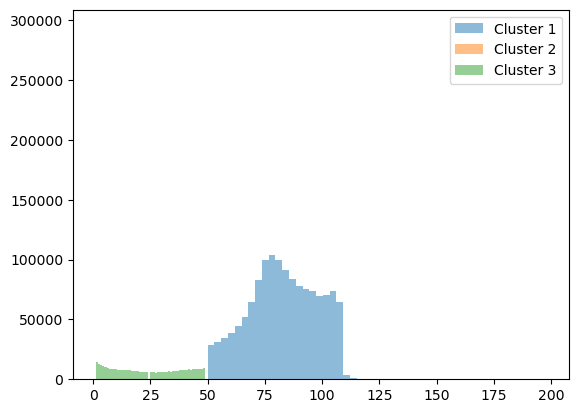

Did sklearn GMM converge : True
Number of iterations by SKlearn GMM : 24
[1 1 1 ... 1 1 1]
ARI Score: 1.0


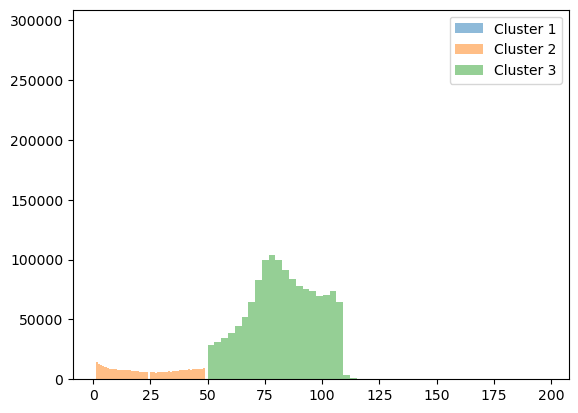

In [ ]:
n_clusters = 3
gmm_instance = gmm(data_matrix,n_clusters)
gmm_instance.fit(threshold=1e-3)
print(gmm_instance.get_cluster_assignments())
gmm_instance.histogram()

## compare with sklearn GMM
from sklearn.mixture import GaussianMixture
sk_gmm = GaussianMixture(n_components=3)
sk_gmm.fit(data_matrix)
print(f"Did sklearn GMM converge : {sk_gmm.converged_}")
print(f"Number of iterations by SKlearn GMM : {sk_gmm.n_iter_}")
print(sk_gmm.predict(data_matrix))
from sklearn.metrics import adjusted_rand_score
print(f"ARI Score: {adjusted_rand_score(gmm_instance.get_cluster_assignments(),sk_gmm.predict(data_matrix))}")

## Compare Means and Variance of my GMM vs SKlearn GMM
print(f"My GMM Means : {gmm_instance.means}")
print(f"My GMM Stds : {gmm_instance.stds}")
print(f"My GMM Weights : {gmm_instance.weights}")
print(f"SKlearn GMM Means : {sk_gmm.means_}")
print(f"SKlearn GMM Stds : {np.sqrt(sk_gmm.covariances_)}")
print(f"SKlearn GMM Weights : {sk_gmm.weights_}")

## mean difference
print(f"Mean Difference of means: {np.linalg.norm(gmm_instance.means-sk_gmm.means_)}")
print(f"Mean Difference of stds: {np.linalg.norm(gmm_instance.stds-np.sqrt(sk_gmm.covariances_))}")
plt.hist(data_matrix[sk_gmm.predict(data_matrix)==0],bins=50,alpha=0.5)
plt.hist(data_matrix[sk_gmm.predict(data_matrix)==1],bins=50,alpha=0.5)
plt.hist(data_matrix[sk_gmm.predict(data_matrix)==2],bins=50,alpha=0.5)
plt.title("SKlearn GMM")
plt.legend(["Cluster 1","Cluster 2","Cluster 3"])
plt.show()